In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
#from ridgeplot import ridgeplot
import joypy
from IPython.display import display, Markdown


pd.option_context('mode.use_inf_as_na', True)

# Vizualizarea asumptiilor modelului liniar

In acest notebook se prezinta simularea relatiei liniare dintre __venit__ (x) si __consum__ (y) si vizualizarea asumptiilor modelului liniar.

Structura:
* Generare date
* Simulare legatura dintre x si y si estimarea acestei legaturi folosind OLS
* Vizualizarea asumptiilor

Obiectiv:
* Intelegerea procesului de estimare a unei legaturi dintre variabile (care in practica nu este stiuta, in acest exemplu se presupune ca o stim, urmand sa vedem cat de bine se estimeaza).
* Vizualizarea si intelegerea asumptiilor modelului liniar. 

## Generare de date

Presupunem ca vrem sa modelam relatia intre __venit__ si __consum__ pentru o populatie anume, presupunem o populatie de 100 000 persoane. 
Variabila independenta este __venitul__, variabila stiuta
1. Generam date aleator despre venit.
2. Simulam o relatie intre venit si consum la care adaugam o perturbatie (normal distribuita)

Generarea de venituri aleatoare

In [74]:
n_population = 100000

#normal distributed scenario
mean_income = 10000
std_income = 3000
incomes = np.random.normal(loc=mean_income, scale=std_income,size=n_population)

#uniform distributed
# low_param = 2000
# high_param = 25000
# incomes = np.random.uniform(low=low_param, high=high_param,size=n_population)

df = pd.DataFrame({'income':incomes})
df


,income
0,10347.041684
1,12542.939414
2,9178.904828
3,10132.550427
4,5102.929280
...,...
99995,10491.033402
99996,11314.566420
99997,7901.434177
99998,8751.552451


Text(0.5, 1.0, 'Income distribution over the population')

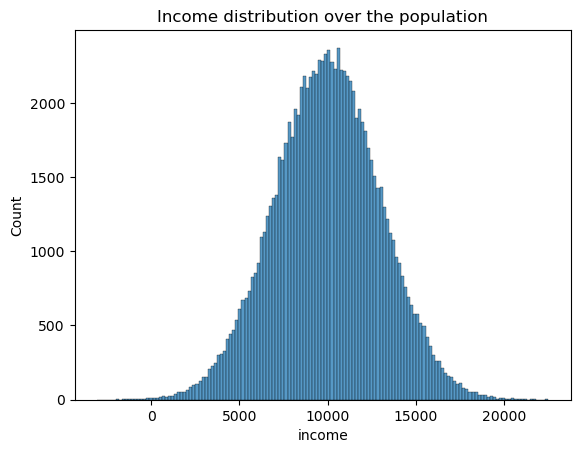

In [75]:
hist_x = sns.histplot(data=df, x='income')
hist_x.set_title('Income distribution over the population')

Definim o relatie intre __venit__ si __consum__ _(este o functie speciala pentru asta in sklearn: make_regression, dar vom face manual)_.

Aceasta va fi de tipul: 

Y = $\beta_0$ + $\beta_1 X_1$ + $\epsilon$


In [76]:

def generate_consumption(x: float, beta0: float, beta1: float, error_mean: float, error_std: float) -> float:
    """
    Generate a simulated consumption value (y) based on a linear regression model.
    
    The model follows the equation:
        y = beta0 + beta1 * x + error
    where 'error' is drawn from a normal distribution with specified mean and standard deviation.
    
    Parameters:
        x (float): The independent variable value.
        beta0 (float): The intercept of the linear model.
        beta1 (float): The coefficient for the independent variable.
        error_mean (float): The mean of the normally distributed error term.
        error_std (float): The standard deviation of the normally distributed error term.
    
    Returns:
        float: The generated dependent variable (y) value.
    
    Example:
        >>> generate_consumption(2.0, 1.0, 0.5, 0.0, 1.0)
        2.47
    """
    error = np.random.normal(loc=error_mean, scale=error_std)
    y = beta0 + beta1 * x + error
    return y

In practica, legatura dintre variabile **nu se stie**, din acest motiv se estimeaza si se presupune o forma a ei (liniara sau nu). In acest exemplu o simulam doar pentru a observa mai bine proprietatile modelului liniar.

In [77]:
# append add the simulated consumption

b0 = 1000
b1 = 0.6
error_mean = 0
error_std = 500

df['consumption'] = df['income'].apply(generate_consumption, args=(b0, b1, error_mean, error_std))
df

,income,consumption
0,10347.041684,7308.380145
1,12542.939414,9418.279424
2,9178.904828,6418.400751
3,10132.550427,6911.643942
4,5102.929280,4765.721665
...,...,...
99995,10491.033402,7078.393593
99996,11314.566420,8272.758197
99997,7901.434177,6085.507629
99998,8751.552451,6117.241928


Presupunem ca aceasta este populatia noastra, 100 000 persoane

Text(0.5, 1.0, 'Consumption distribution over the population')

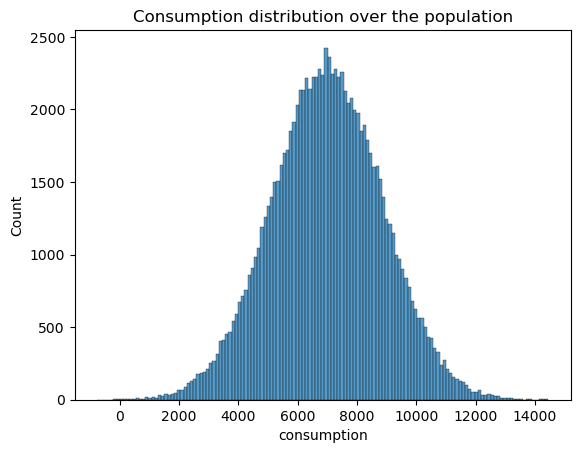

In [78]:
hist_y = sns.histplot(data=df, x='consumption')
hist_y.set_title('Consumption distribution over the population')

Vizualizare legatura dintre venit si consum.

Text(0.5, 1.0, 'Linear relationship betwwen income and consumption')

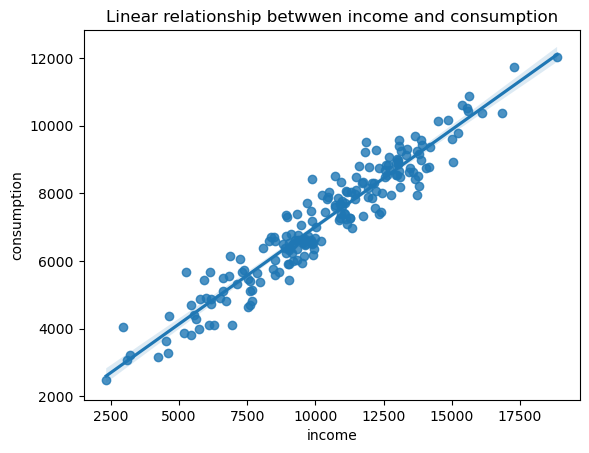

In [79]:
relationship_plot = sns.regplot(data=df.sample(200), x='income',y='consumption')
relationship_plot.set_title('Linear relationship betwwen income and consumption')

Mai jos estimam parametrii $\beta_0$ si $\beta_1$ pe un esantion de _n_ de persoane din populatia de 100 000. 

In [80]:
model.params[0]

C:\Users\octav\AppData\Local\Temp\ipykernel_26176\629825848.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model.params[0]


935.5751155637251

In [81]:
n_sample = 1000
df_sample = df.sample(n_sample)
model = smf.ols(formula="consumption~income",data=df_sample).fit()
print(model.summary())

text_to_display = f"The estimated parameters (coefficients) on the sample of {n_sample} observations, out of population of {n_population} are:" \
    f" <br> $\\hat\\beta_0$ = {(model.params.iloc[0]).round(3)} (vs actual value of $\\beta_0$ = {b0})"\
    f" <br> $\\hat\\beta_1$ = {(model.params.iloc[1]).round(3)} (vs actual value of $\\beta_0$ = {b1})"
display(Markdown(text_to_display))


                            OLS Regression Results                            
Dep. Variable:            consumption   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 1.444e+04
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        17:49:54   Log-Likelihood:                -7620.5
No. Observations:                1000   AIC:                         1.524e+04
Df Residuals:                     998   BIC:                         1.525e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    934.8965     52.042     17.964      0.0

The estimated parameters (coefficients) on the sample of 1000 observations, out of population of 100000 are: <br> $\hat\beta_0$ = 934.896 (vs actual value of $\beta_0$ = 1000) <br> $\hat\beta_1$ = 0.605 (vs actual value of $\beta_0$ = 0.6)

Sunt mici diferente intre parametri (pe care in practica nu ii vei sti niciodata si estimarile obtinute, folosind estimatorul OLS)

Vom face predictii pe **tot** setul de date folosind modelul estimat

In [82]:
df['predicted_consumption'] = model.predict(df['income'])

Definim residuurile

*Diferenta dintre reziduu si eroare*

Eroarea este diferenta dintre valoarea observata si regresia (modelul) adevarata (cand se stiu parametri). Este o valoare teoretica deoarece in practica nu se stie niciodata adevarata regresie (adica parametrii). 

* $eroare$ = $y$ - ($\beta_0$ + $\beta_1 X_1$), $\beta_0$ si $\beta_1$ sunt nestiute in teorie
* $reziduu$ = $y$ - ($\hat\beta_0$ + $\hat\beta_1 X_1$)

Analizand reziduurile putem avea o imagine despre cum ar arata erorile.

In [83]:
df['residual'] = df['consumption'] - df['predicted_consumption']


Text(0.5, 1.0, 'Residual distribution over the population')

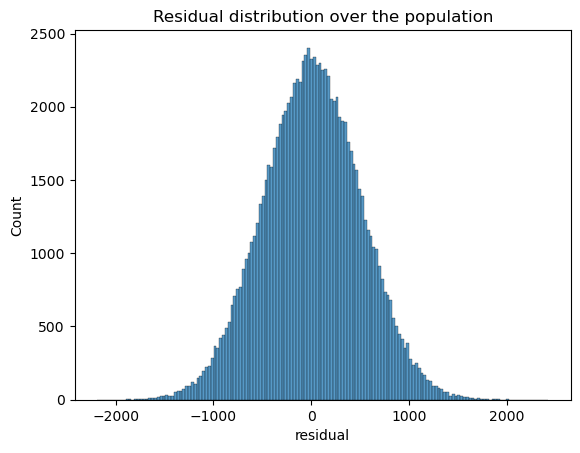

In [84]:
hist_resid = sns.histplot(data = df, x='residual')
hist_resid.set_title("Residual distribution over the population")

Reziduurile arata bine, sunt distribuite, media pare sa fie 0. 

Text(0.5, 1.0, 'Boxplot of residuals')

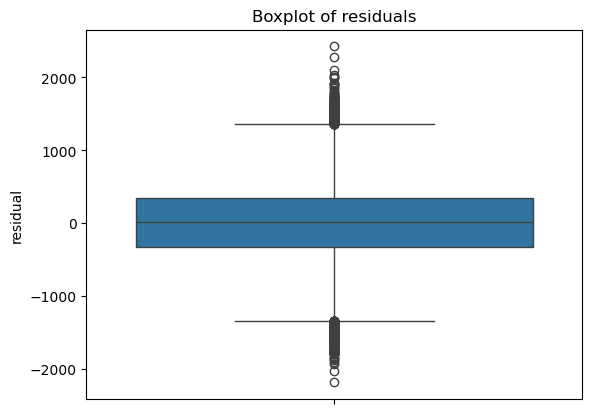

In [85]:
boxplot_resid = sns.boxplot(data=df, y='residual')
boxplot_resid.set_title('Boxplot of residuals')

# Vizualizarea ipotezelor

### 1. Relatia adevarata e liniara

**Liniaritate**: Legatura **adevarata** dintre x si y este liniara poate fi estimata bine printr-un model liniar.

$Y$ = $\beta_0$ + $\beta_1X$ + $\epsilon$

*(in realitate este o relatie afina, nu una liniara pentru ca nu se respecta proprietatile de liniaritate (aditivitate, multiplicitate))*

#### De ce e important

* Daca relatia adevarata nu e una liniara si noi presupunem ca este, atunci vom modela o problema cu un instrument nepotrivit (a manca supa cu o furculita). 

Text(0.5, 1.0, 'Linear relationship between income and consumption')

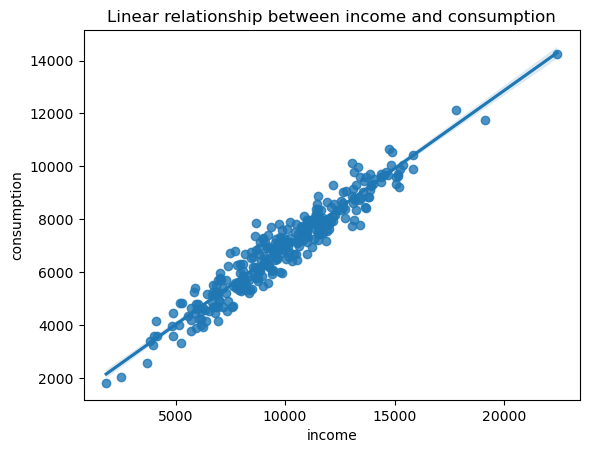

In [86]:
relationship_plot = sns.regplot(data=df.sample(300), x='income',y='consumption')
relationship_plot.set_title('Linear relationship between income and consumption')

Se poate observa ca legatura este liniara. Nu sunt pattern-uri de non liniaritate, nici macar local.

### 2. Eroarea conditionata este 0

$E[\epsilon \mid X] = 0$

**Eroarea conditionata este 0** (sau este dintr-o distributie normala cu medie 0)

Pentru oricare observatie *x* (sau *X* in cazul mai multor dimensiuni ale observatiei) media erorilor pentru acea observatie trebuie sa fie 0 sau sa erorile sa vina dintr-o distributie normala cu media 0. 

Exemplu: Daca in populatie am avea 100 de observatii cu *x=5000* reziduurile acestor 100 de observatii cu cate *x=5000* ar trebui sa aiba media 0 sau reziduurile sa vina dintr-o distributie normala de medie 0 (deci pot fi mici diferente).

Pentru a vizualiza aceasta asumptie in setul de date generat ar trebui sa avem mai multe observatii pentru acelasi *x*, iar apoi sa vedem distributia acestor erori. Neavand mai multe observatii pentru acelasi *x* *(ex. x=5000)* vom lua vecinatatea. 
Spre exemplu, vom analiza distributia erorilor pe calupuri, *x intre 5000 si 5050* in loc de x=5000*. 

Adaugam label la fiecare observatie cu intervalul lui x.

#### De ce e important

* Daca nu se respecta ipoteza, predictiile ar fi deplasate. Deplasarea implica o eroare sistematica asupra predictiilor, unde media erorilor e diferita de zero, deci modelul are tendinta sa supraestimeze sau sa subestimeze predictiile.

In [87]:
#Define the bins and labels
bins = range(2000, 30001, 50)
labels = [f"{i}_{i+50}" for i in range(2000, 30000, 50)]

# Add a new column with the interval labels
df['interval_income'] = pd.cut(df['income'], bins=bins, labels=labels, right=False)

df

,income,consumption,predicted_consumption,residual,interval_income
0,10347.041684,7308.380145,7199.875015,108.505130,10300_10350
1,12542.939414,9418.279424,8529.458148,888.821276,12500_12550
2,9178.904828,6418.400751,6492.585672,-74.184921,9150_9200
3,10132.550427,6911.643942,7070.003776,-158.359834,10100_10150
4,5102.929280,4765.721665,4024.643625,741.078040,5100_5150
...,...,...,...,...,...
99995,10491.033402,7078.393593,7287.059839,-208.666247,10450_10500
99996,11314.566420,8272.758197,7785.696728,487.061469,11300_11350
99997,7901.434177,6085.507629,5719.096357,366.411272,7900_7950
99998,8751.552451,6117.241928,6233.830219,-116.588291,8750_8800


Pentru o vizualizare simplificata, vom genera distributiile doar pentru intervalul de x intre 5000 si 6000.

Text(0.5, 1.0, 'Conditional error distribution')

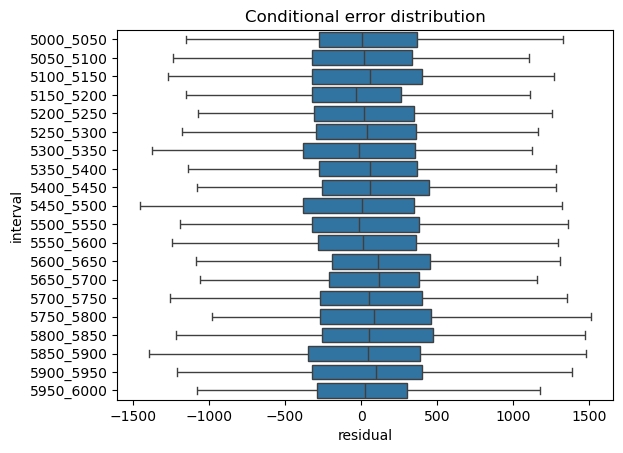

In [88]:
df_sample_small = df[df['income'].between(5000,6000)].copy()
df_sample_small.sort_values(by='income',inplace=True)
df_sample_small['interval'] = df_sample_small['interval_income'].astype('str')
boxplot_conditional_resid = sns.boxplot(data=df_sample_small, y='interval',x='residual', showfliers=False)
boxplot_conditional_resid.set_title('Conditional error distribution')

Putem observa faptul ca reziduurile nu au chiar media 0, insa par a veni dintr-o distributie normala cu media 0. Pentru a *crede* aceasta ipoteza se pot aplica **teste dedicate**.

Se poate observa ca distributia erorilor pentru x in intervalele de pe OY tine sa aiba media 0.

### 3. Homoscedasticitatea

$\text{Var}(\epsilon \mid X) = \sigma^2$

Varianta erorilor ar trebui sa fie aceeasi pentru oricare x. Vizualizand graficele de mai sus, se poate observa ca ele tind sa variantele tind sa fie cam la fel. 

#### De ce e important

* Daca varianta erorilor difera in functie de X, atunci intervalele de incredere pentru predictii sunt afectate. Spre exemplu, pentru income mare poate fi eroare mai mare. Interpretarea ar fi ca pentru oamenii cu venit mai mare exista mai multi factori care ar explica consumul.

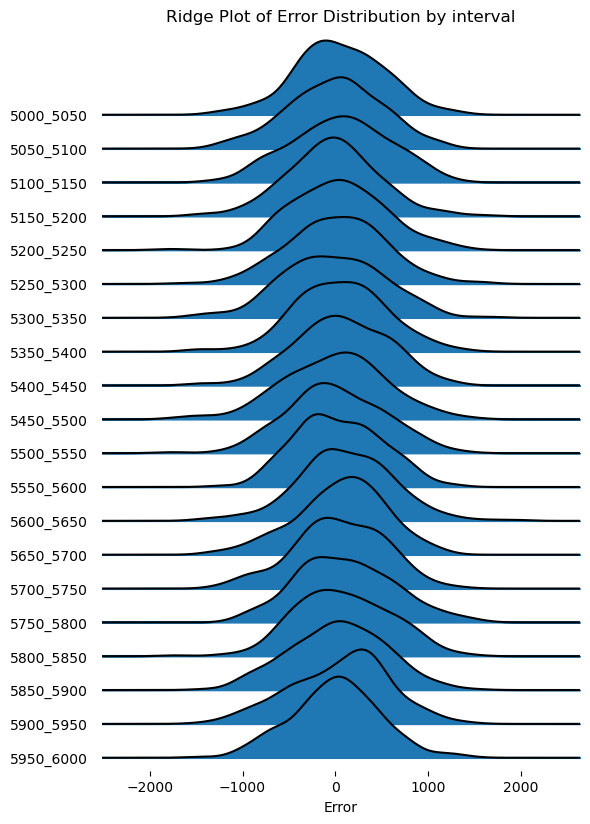

In [89]:
#Create a ridge plot using joypy
fig, axes = joypy.joyplot(df_sample_small, by="interval", column="residual", figsize=(6, 8))

plt.title("Ridge Plot of Error Distribution by interval")
plt.xlabel("Error")
plt.ylabel("Label")
plt.show()

Distributiile acestor reziduuri trebuie sa aiba aceeasi varianta pentru fiecare *x* (in cazul nostru intervale).
Din grafice pare ca variantele sunt la fel *(homo)*. Pentru a crede aceasta ipoteza se pot efectua teste dedicate.

### 4. Erorile nu sunt corelate intre ele


$\text{Cov}(\epsilon_i, \epsilon_j) \neq 0$

Erorile pentru x=i nu sunt corelate cu erorile pentru x=j , pentru oricare i diferit de j. Spre exemplu, eroarea pentru cei care au x (income) 5000 lei nu e influentata de cei care au venit 4999 lei sau oricare alta valoare. 
Practic, eroarea unei observatii nu trebuie sa ofere informatie pentru a explica eroarea altei observatii.

Aceasta asumptie este mai usor de intuit in modelele de serii de timp.

Exemplu din practica in cross sectional data: ai un model care estimeaza pretul unui apartament care are ca X: mp, vechime bloc. Daca exista pattern-uri de corelatii intre erori, se poate datora faptului ca ele provin din cartiere diferite si nu exista aceasta informatie in variabilele independente X.



#### De ce e important
* Intervalele de incredere sunt afectate. 
* Afecteaza testele privind normalitatea erorilor sau daca un parametru e semnificativ diferit de 0.

### 5. Erorile nu sunt corelate cu X

(exogeneity)

Variatia lui X nu trebuie sa aiba un impact in erori.

$\text{Cov}(\epsilon, X) = 0$


#### De ce e important
* Exista inca informatie in X despre y care nu a fost folosita de model. Modelul nu e destul de potrivit.
* Nu avem o interpretabilitate precisa a modului in care X influenteaza y.
* Pot aparea erori neasteptate.



Text(0.5, 1.0, 'Relationship between residuals and X')

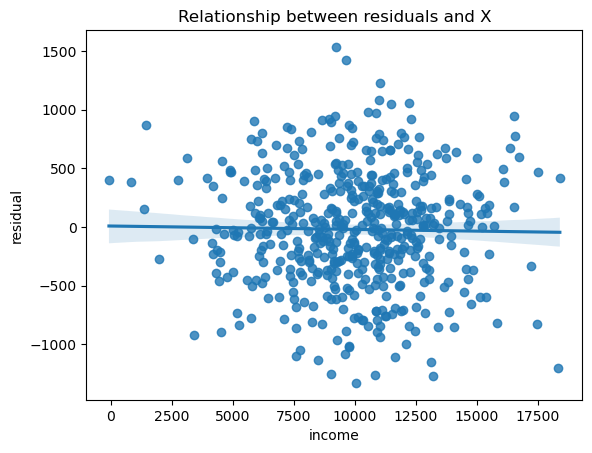

In [90]:
scatter_plot_errors_x = relationship_plot = sns.regplot(data=df.sample(500), x='income',y='residual')
scatter_plot_errors_x.set_title('Relationship between residuals and X')

Erorile pentru care oricare income *(x)* nu ofera indicii despre oricare alta eroare aferenta altui *x*.

### 6. Variabilele independente nu sunt corelate

In exemplul nostru avem o singura variabile X, income, daca ar mai fi inca una, age, de exemplu, acestea ar trebui sa nu fie corelate.

#### De ce e important

* Nu stim exact contributia adevarata a lui X pentru y.
* Pot aparea erori neprevazute. 
* Daca e multicoliniaritate perfecta, nu se poate inversa matricea de design X. 